# Decision Tree in Machine Learning

A decision tree is a supervised learning algorithm used for both classification and regression tasks. It has a hierarchical tree structure which consists of a root node, branches, internal nodes and leaf nodes. It works like a flowchart help to make decisions step by step where:

* Internal nodes represent attribute tests
* Branches represent attribute values
* Leaf nodes represent final decisions or predictions.

Decision trees are widely used due to their interpretability, flexibility and low preprocessing needs.

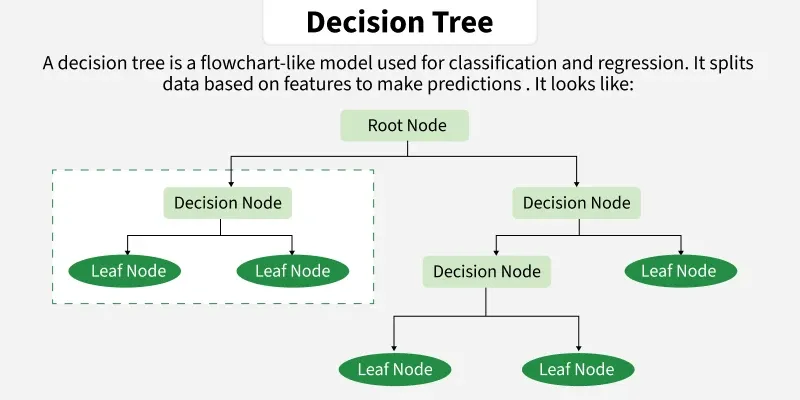

## Types of Decision Trees

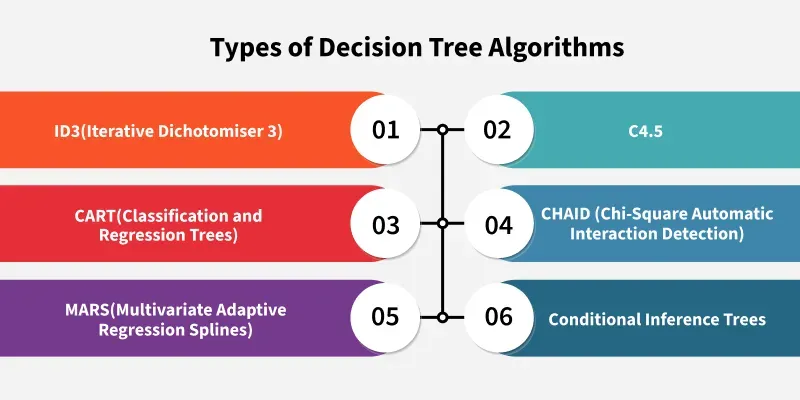

#### 1. ID3 (Iterative Dichotomiser 3):

ID3 uses entropy and information gain to build the tree. It selects the attribute that maximizes information gain at each node.

#### 2. C4.5:

C4.5 is an extension of ID3 that handles both continuous and discrete attributes, deals with missing values, and uses gain ratio for attribute selection.

#### 3. CART (Classification and Regression Trees):

CART can be used for both classification and regression tasks. It uses Gini impurity for classification and mean squared error for regression.

#### 4. CHAID (Chi-squared Automatic Interaction Detector):

CHAID uses chi-squared tests to determine the best splits and is often used for categorical target variables.

#### 5. MARS (Multivariate Adaptive Regression Splines):

MARS is used for regression tasks and builds piecewise linear models.

#### 6. Conditional Inference Trees:

Conditional Inference Trees use statistical tests to select splits, reducing bias in variable selection.


## How Does a Decision Tree Work

A decision tree splits the dataset based on feature values to create pure subsets ideally all items in a group belong to the same class. Each leaf node of the tree corresponds to a class label and the internal nodes are feature-based decision points. 

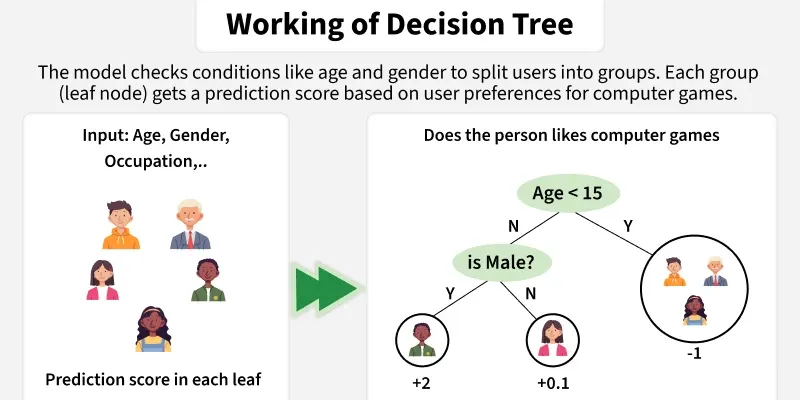

Let’s understand this with an example.

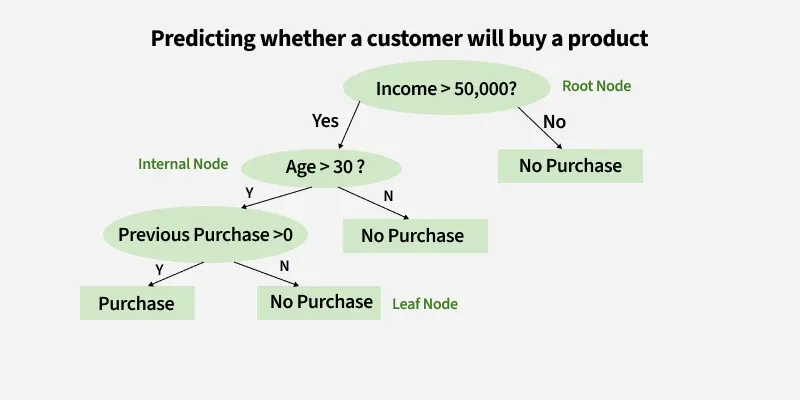

Let’s consider a decision tree for predicting whether a customer will buy a product based on age, income and previous purchases: Here's how the decision tree works:

#### 1. Root Node (Income)

First Question: "Is the person’s income greater than $50,000?"

* If Yes, proceed to the next question.
* If No, predict "No Purchase" (leaf node).
1
#### 2. Internal Node (Age):

If the person’s income is greater than $50,000, ask: "Is the person’s age above 30?"

* If Yes, proceed to the next question.
* If No, predict "No Purchase" (leaf node).

#### 3. Internal Node (Previous Purchases):

* If the person is above 30 and has made previous purchases, predict "Purchase" (leaf node).
* If the person is above 30 and has not made previous purchases, predict "No Purchase" (leaf node).



## Information Gain and Gini Index in Decision Tree

Information Gain tells us how useful a question (or feature) is for splitting data into groups. It measures how much the uncertainty decreases after the split.


When building a decision tree, we need to decide which feature to split on at each node. Two common metrics used for this purpose are Information Gain and Gini Index.

### 1. Information Gain

Information Gain measures the reduction in uncertainty about the target variable after splitting the data based on a feature. It is calculated using entropy, which quantifies the impurity or disorder of a dataset.

**Entropy Formula:**

Entropy(S) = - Σ (p(x) * log2(p(x)))

Where p(x) is the proportion of instances belonging to class x in dataset S.
**Information Gain Formula:**

Information Gain(S, A) = Entropy(S) - Σ (|Sv| / |S|) * Entropy(Sv)

Where Sv is the subset of S for which feature A has value v.

### Building Decision Tree using Information Gain the essentials

* Start with all training instances associated with the root node
* Use info gain to choose which attribute to label each node with
* Recursively construct each subtree on the subset of training instances that would be classified down that path in the tree.
* If all positive or all negative training instances remain, the label that node “yes" or “no" accordingly
* If no attributes remain label with a majority vote of training instances left at that node
* If no instances remain label with a majority vote of the parent's training instances.


### 2. Gini Index

The Gini Index measures the impurity of a dataset. It ranges from 0 (pure) to 0.5 (impure). A lower Gini Index indicates a better split.

Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified. It means an attribute with a lower Gini index should be preferred. Sklearn supports “Gini” criteria for Gini Index and by default it takes “gini” value.

**Gini Index Formula:**

Gini(S) = 1 - Σ (p(x)^2)

Where p(x) is the proportion of instances belonging to class x in dataset S.

When building a decision tree, the feature that results in the highest Information Gain or the lowest Gini Index is chosen for splitting the data at each node. This process continues recursively until a stopping criterion is met, such as reaching a maximum tree depth or having a minimum number of samples in a leaf node.




# Working with DecisionTreeClassifier

Here is an example of how to use the `DecisionTreeClassifier` from the `sklearn` library in Python:

### The syntax for DecisionTreeClassifier is as follows:

class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None,ccp_alpha=0.0, monotonic_cst=None)

Parameters:

* **criterion:** It measure the quality of a split. Supported values are 'gini', 'entropy' and 'log_loss'. The default value is 'gini'
* **splitter:** This parameter is used to choose the split at each node. Supported values are 'best' & 'random'. The default value is 'best'
* **max_features:** It defines the number of features to consider when looking for the best split.
* **max_depth:** This parameter denotes maximum depth of the tree (default=None).
* **min_samples_split:** Defines the minimum number of samples required to split an internal node (default = 2).
* **min_samples_leaf:** The minimum number of samples required to be at a leaf node (default=1)
* **max_leaf_nodes:** It defines the maximum number of possible leaf nodes.
* **min_impurity_split:** It defines the threshold for early stopping tree growth.
* **class_weight:** It defines the weights associated with classes.
* **ccp_alpha:** It is a complexity parameter used for minimal cost-complexity pruning

#### 1: Importing Libraries

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split;
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#### 2: Loading the Dataset

In [2]:
df = load_iris()
X = df.data
y = df.target

#### 3: Splitting the Dataset

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

#### 4: Defining the Model

In [5]:
model = DecisionTreeClassifier(random_state=1)

#### 5: Training the Model

In [6]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### 6: Making Predictions

In [7]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.56%


## 7: Hyperparameter Tuning with Decision Tree Classifier using GridSearchCV

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}

tree = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, 
                           cv=5, verbose=True)
grid_search.fit(X_train, y_train)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.9714285714285715
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=1)


#### 8: Visualizing the Decision Tree Classifier

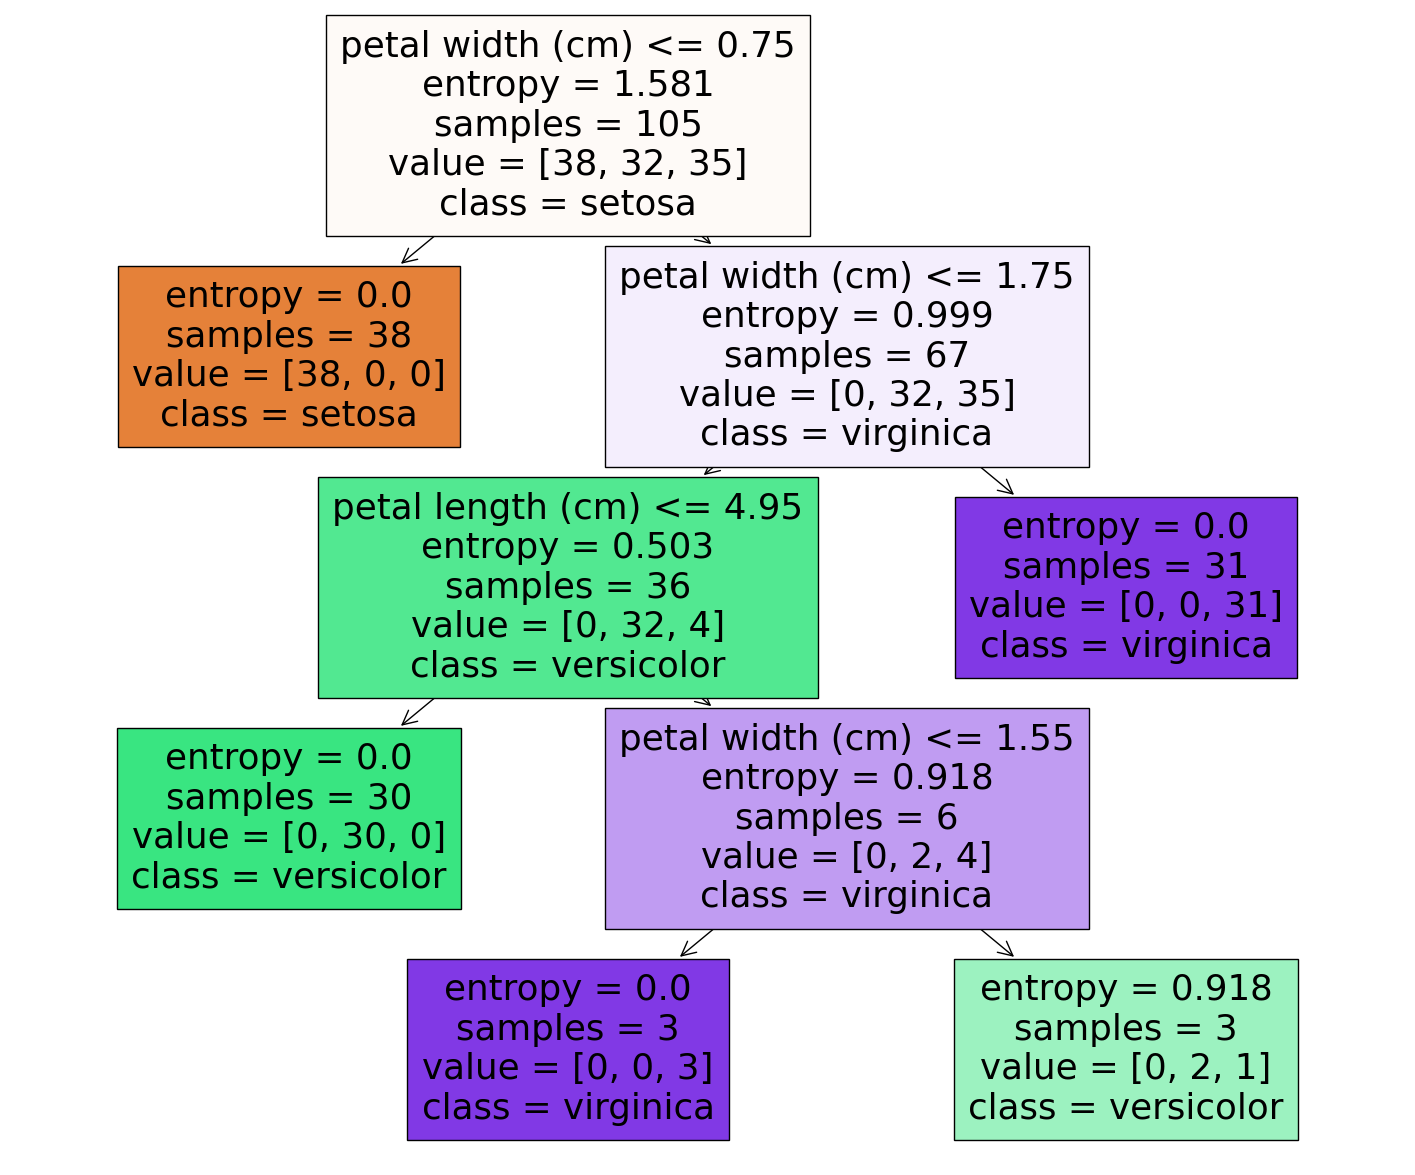

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
 
tree_clf = grid_search.best_estimator_

plt.figure(figsize=(18, 15))
plot_tree(tree_clf, filled=True, feature_names=df.feature_names,
          class_names=df.target_names)
plt.show()

# Ex:2 Implementing Decision Tree Regression

A Decision Tree Regressor is used to predict continuous values such as prices or scores using a tree-like structure. It splits the data into smaller groups based on simple rules derived from input features, helping reduce prediction errors. At the end of each branch, called a leaf node, the model outputs a value, i.e usually the average of that group.

#### Step 1: Importing the required libraries

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_text


#### Step 2: Creating a Sample Dataset

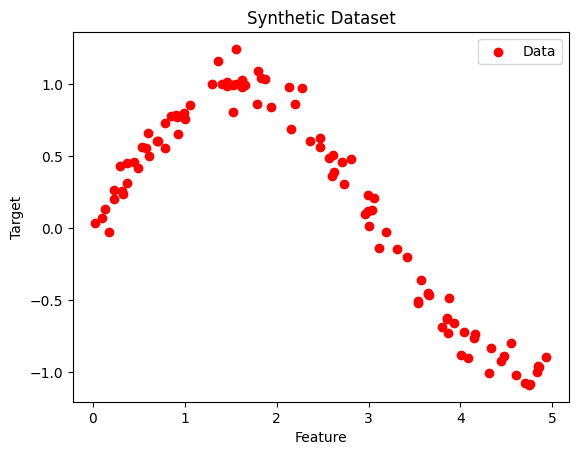

In [13]:
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

plt.scatter(X, y, color='red', label='Data')
plt.title("Synthetic Dataset")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

#### Step 3: Splitting the Dataset

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 4: Initializing the Decision Tree Regressor

In [15]:
model = DecisionTreeRegressor(max_depth=4, random_state=42)

#### Step 5: Fiting Decision Tree Regressor Model

In [16]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

#### Step 6: Predicting a New Value

In [17]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0154


#### Step 7: Visualizing the result

C:\Users\PANDIT JI\AppData\Local\Temp\ipykernel_1260\4019068627.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]


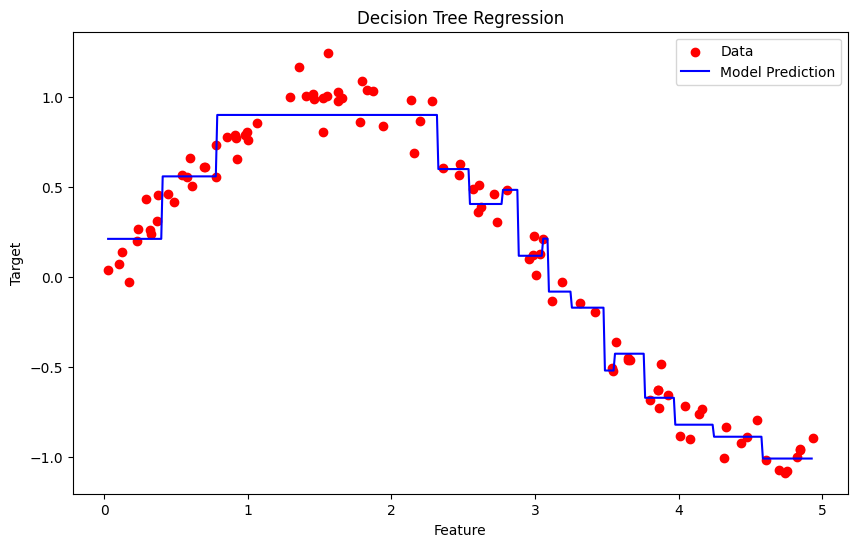

In [19]:
X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]
y_grid_pred = model.predict(X_grid)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Data')
plt.plot(X_grid, y_grid_pred, color='blue', label='Model Prediction')
plt.title("Decision Tree Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

## Step 8: Export and Show the Tree Structure below

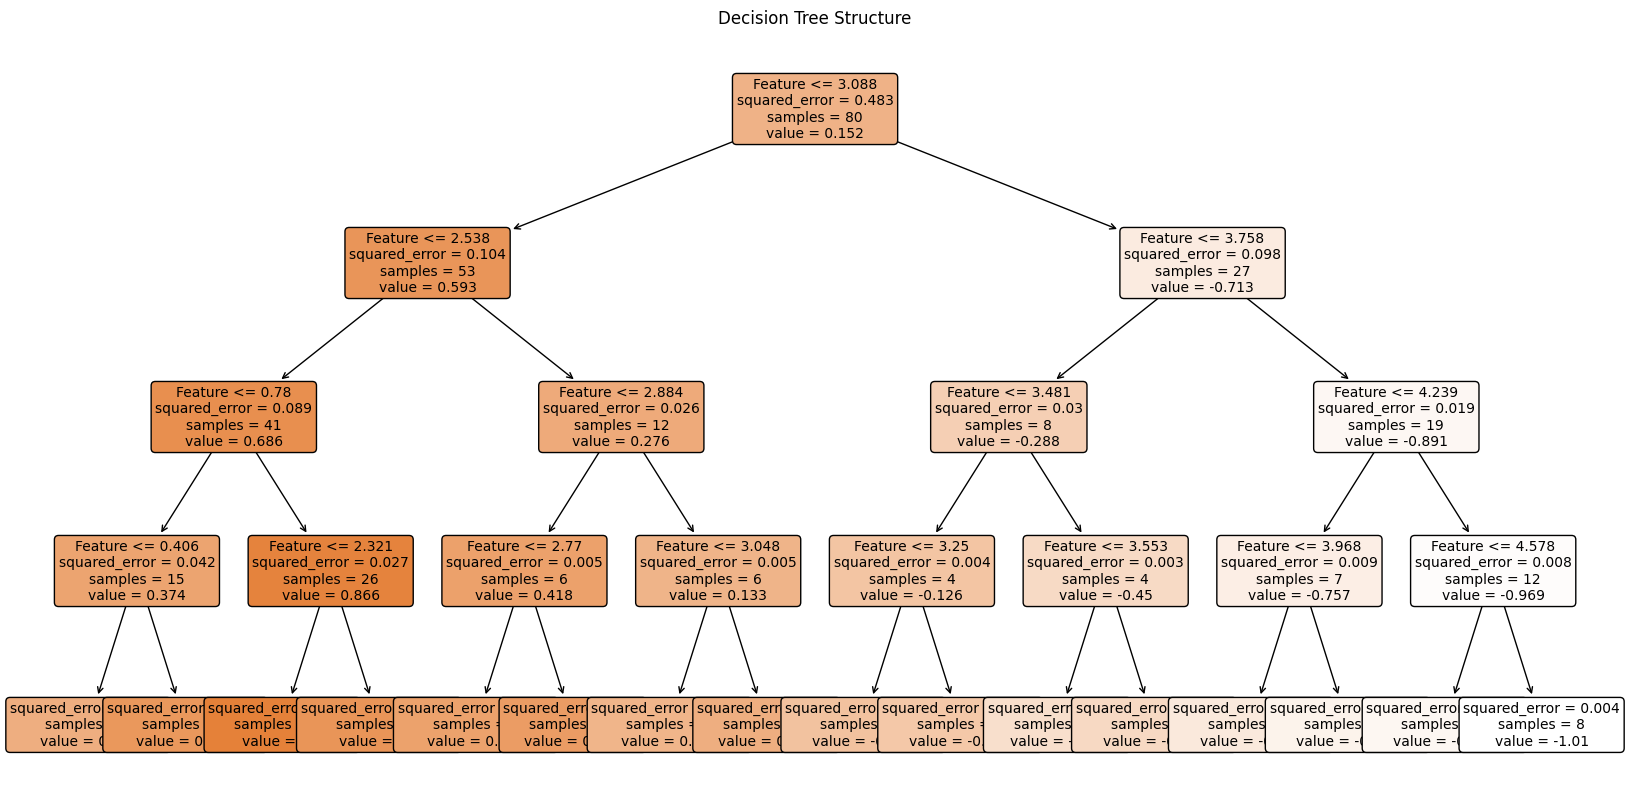

In [20]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=["Feature"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()